In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from natsort import natsorted

# Path to folder containing CSV files
folder_path = '/home/anish/Desktop/01-cfm/Pr004_chemOS/Data/2022-02-21-sc-aunr-1'

# Load reference CSV file
ref_df = pd.read_csv(os.path.join(folder_path, 'rev-obj.csv'))

# Initialize empty list to store norm values
norm_values = []
file_names = []

# Loop through all CSV files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv') and filename != 'rev-obj.csv':
        # Load CSV file into a Pandas DataFrame
        df = pd.read_csv(os.path.join(folder_path, filename))
        
        # Normalize the second column of the DataFrame
        df.iloc[:, 1] = (df.iloc[:, 1] - df.iloc[:, 1].min()) / (df.iloc[:, 1].max() - df.iloc[:, 1].min())     

        # Calculate the L2 norm of the difference between the normalized second column of the file and the reference file
        diff = df.iloc[:, 1] - ref_df.iloc[:, 1]

        norm_value = np.linalg.norm(diff)
        norm_value = round(norm_value, 2)
        
        # Add the norm value to the list
        norm_values.append((filename,norm_value))

# Print the list of all the norm values
print(natsorted(norm_values))

FileNotFoundError: [Errno 2] No such file or directory: '/home/anish/Desktop/01-cfm/Pr004_chemOS/Data/2022-02-21-sc-aunr-1/rev-obj.csv'

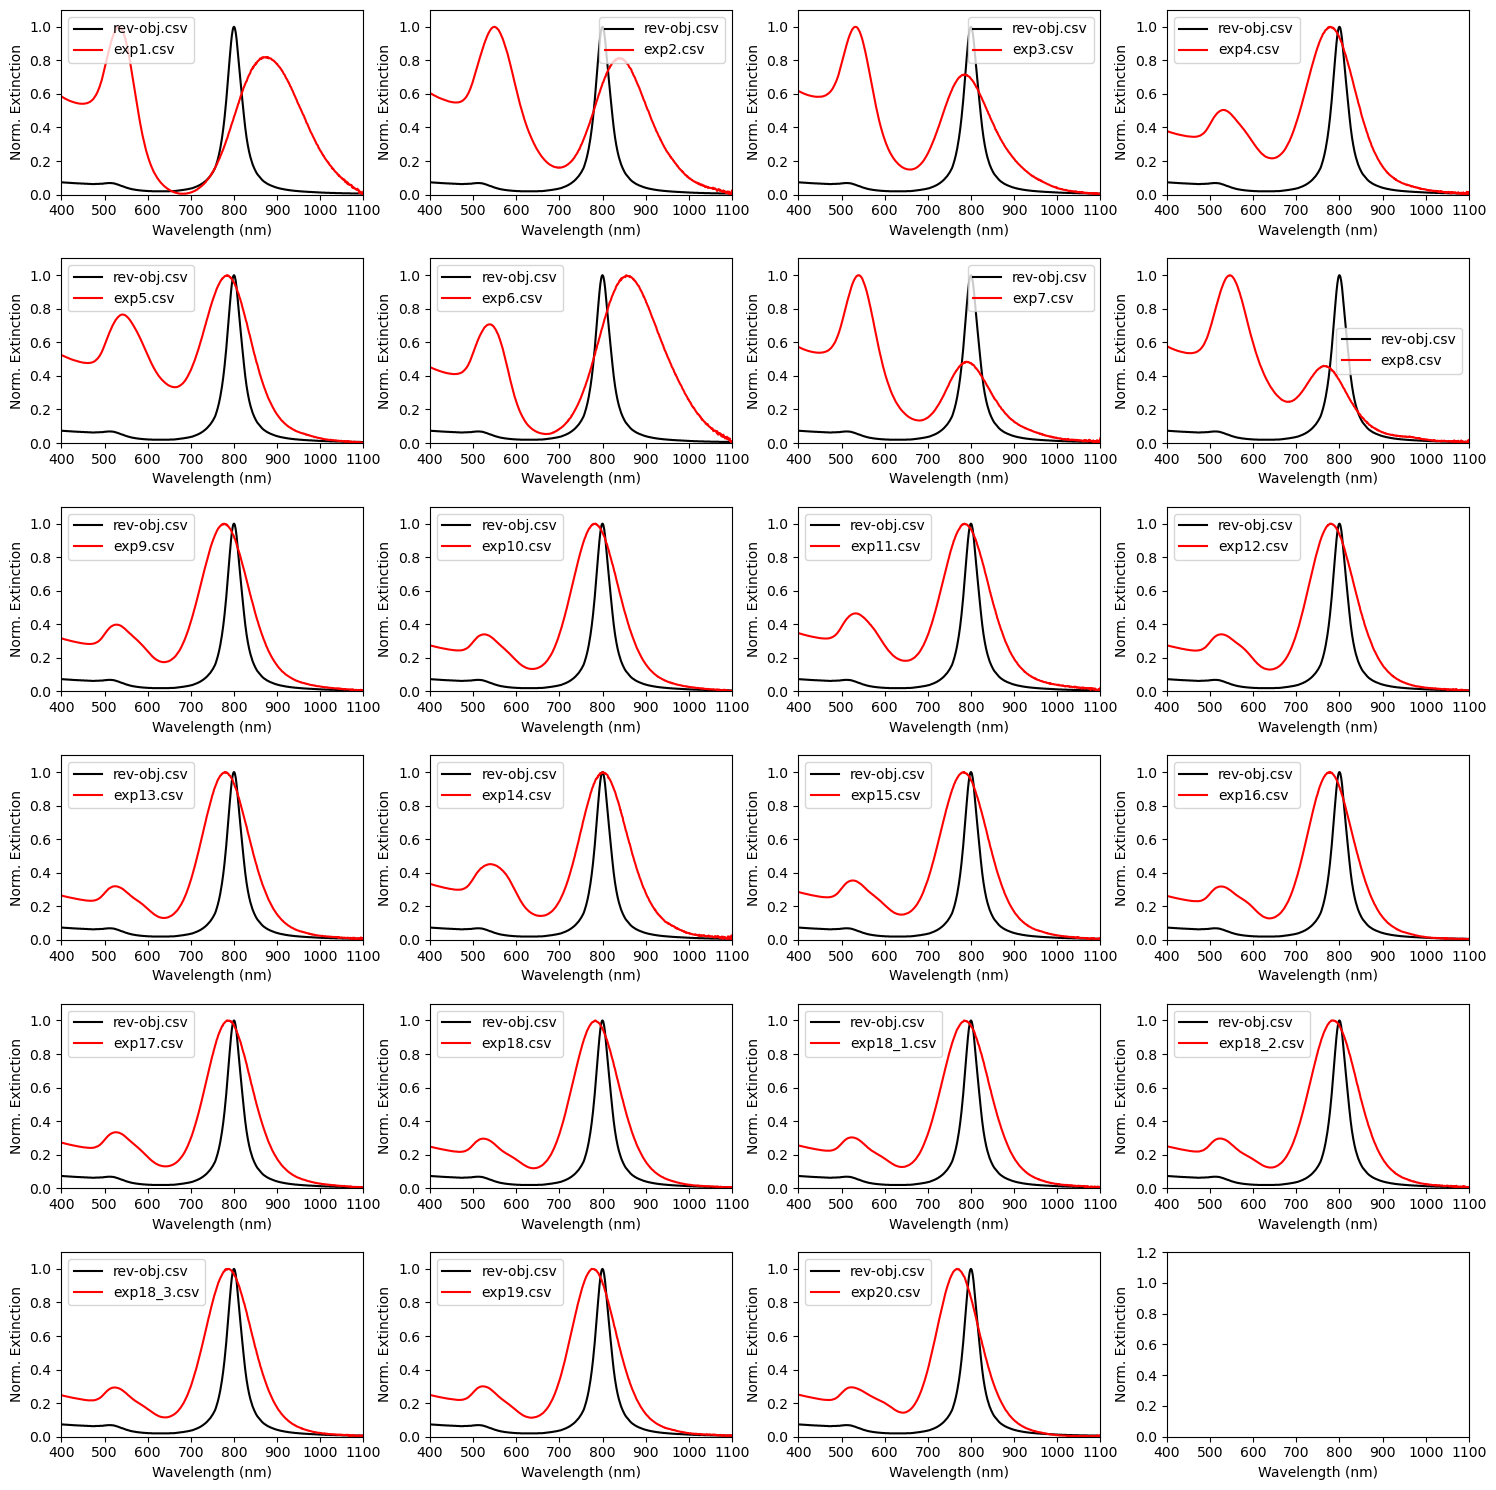

Abs at lambda max. / Abs at 400nm is [1.71, 1.65, 1.62, 2.64, 1.91, 2.21, 1.75, 1.73, 3.16, 3.64, 2.88, 3.64, 3.78, 2.99, 3.5, 3.82, 3.67, 4.02, 3.92, 3.99, 4.05, 4.02, 3.98]


In [5]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the folder containing the CSV files
folder_path = '/home/anish/Desktop/01-cfm/Pr004_chemOS/Data/2022-02-21-sc-aunr-1/'

# Get a list of all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Define the reference CSV file name
ref_file_name = 'rev-obj.csv'

# Read the reference CSV file into a Pandas DataFrame
ref_df = pd.read_csv(os.path.join(folder_path, ref_file_name), header=None)

# Create a figure with 2 rows and 5 columns of subplots
fig, axs = plt.subplots(6, 4, figsize=(15, 15))

# Initialize variables to keep track of subplot indices
row_index = 0
col_index = 0

# Initialize empty list to store Abs at lambda max. / Abs at 400nm
abs_ratios = []

# Loop through all CSV files in the folder
for csv_file in natsorted(csv_files):
    
    # Check if the current file is not the reference file
    if os.path.basename(csv_file) != ref_file_name:
        # Read the CSV file into a Pandas DataFrame
        df = pd.read_csv(csv_file, header=None)

        # Normalize the second column of the DataFrame
        df.iloc[:, 1] = (df.iloc[:, 1] - df.iloc[:, 1].min()) / (df.iloc[:, 1].max() - df.iloc[:, 1].min())
        
        # Calculate the ratio of abs at lambda max / abs at 400nm
        abs_ratio = df.iloc[:, 1].max() / df.iloc[700, 1]
        #print(df.iloc[:, 1].max())
        #print(df.iloc[700, 1])
        abs_ratios.append(round(abs_ratio, 2))
        
        # Plot the normalized second column of the current file against the reference file in the current subplot
        axs[row_index, col_index].plot(ref_df[0], ref_df[1], color = 'k', label=ref_file_name)
        axs[row_index, col_index].plot(df.iloc[:, 0], df.iloc[:, 1], color='r', label=os.path.basename(csv_file))
        axs[row_index, col_index].set_xlabel('Wavelength (nm)')
        axs[row_index, col_index].set_ylabel('Norm. Extinction')
        axs[row_index, col_index].legend()
        axs[row_index, col_index].set_xlim(400,1100)
        axs[row_index, col_index].set_ylim(0,1.1)

        fig.tight_layout()

        # Increment the column index
        col_index += 1

        # If the column index is equal to 5, reset it to 0 and increment the row index
        if col_index == 4:
            col_index = 0
            row_index += 1

# Add labels and title to the plot
plt.xlabel('Wavelength (nm)')
plt.ylabel('Norm. Extinction')
plt.rcParams['font.size'] = 10
plt.rc('axes', titlesize=20)
plt.xlim(400,1100)
plt.ylim(0,1.2)
plt.show()

print('Abs at lambda max. / Abs at 400nm is', abs_ratios)